**PREDICTING CUSTOMER CHURN**

Identifying customers that are subceptible to churn in order to enhance retention strategies and boost business growth.



**IMPORTING PACKAGES**

In [103]:
# Import necessary modules
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

**DATA COLLECTION**

Load the dataset into python using pandas

In [104]:
df= pd.read_excel('/content/drive/MyDrive/predictingcustomer churn/Dataset (1).xlsx')

**DATA  EXPLORATION**

In [105]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [106]:
#handling missing values
missing_values = df.isna().sum()
print(missing_values)

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64


In [107]:
# Check for duplicate rows in the DataFrame
df.duplicated().any()

False

In [108]:
# Generate a statistical overview of the numerical columns in the DataFrame
stats_overview = df.describe().T
print(stats_overview)

              count         mean          std     min     25%     50%  \
CustomerID  12483.0  7242.000000  3603.676040  1001.0  4121.5  7242.0   
Age         12483.0    43.930065    15.341521    18.0    31.0    44.0   
NPS         12483.0     2.973884     2.644623     0.0     1.0     2.0   
ChurnLabel  12483.0     0.505808     0.499986     0.0     0.0     1.0   

                75%      max  
CustomerID  10362.5  13483.0  
Age            57.0     70.0  
NPS             4.0      9.0  
ChurnLabel      1.0      1.0  


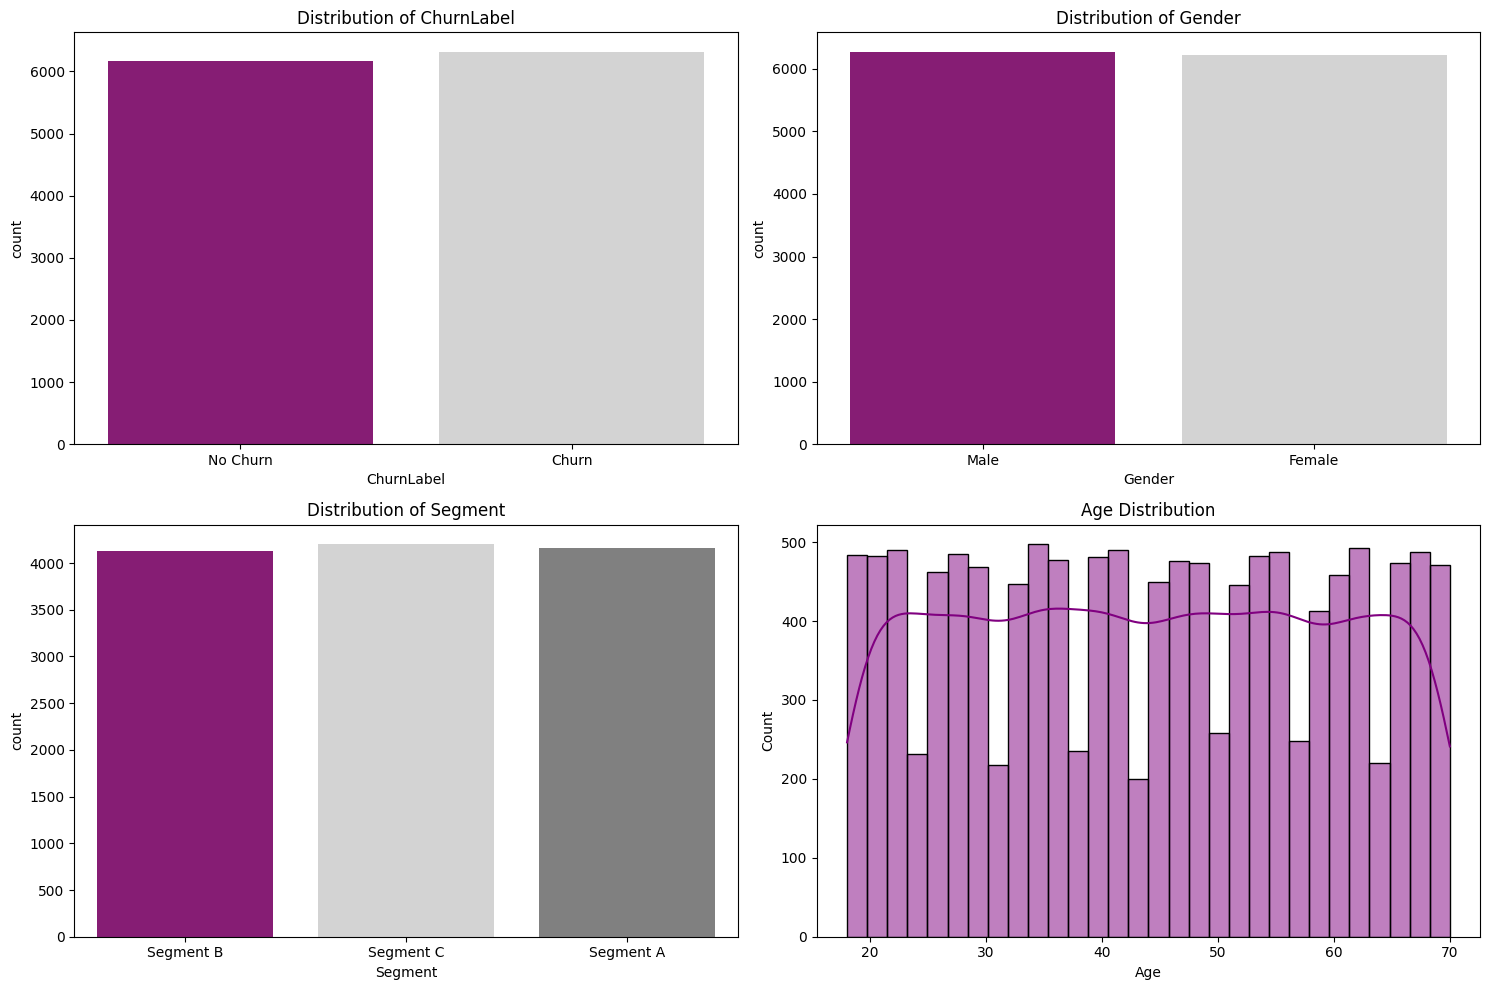

In [109]:
# Create a grid of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of the target variable (ChurnLabel)
color = ["#980B80", "#D3D3D3", "#808080"]
sns.countplot(x='ChurnLabel', data=df, palette=color, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

# Plot the distribution of the Gender variable
sns.countplot(x='Gender', data=df, palette=color, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

# Plot the distribution of the Segment variable
sns.countplot(x='Segment', data=df, palette=color, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segment')

# Plot the distribution of Age using a histogram with KDE (Kernel Density Estimate)
sns.histplot(df['Age'], bins=30, ax=ax[1, 1], kde=True, color='purple')
ax[1, 1].set_title('Age Distribution')

# Adjust subplot layout for better spacing
plt.tight_layout()

# Display all the plots
plt.show()


In [110]:
#correlation_matrix
correlation = df.select_dtypes(include=np.number).corr()
print(correlation)

            CustomerID       Age       NPS  ChurnLabel
CustomerID    1.000000 -0.002670 -0.002513    0.001530
Age          -0.002670  1.000000  0.000006    0.010273
NPS          -0.002513  0.000006  1.000000   -0.540703
ChurnLabel    0.001530  0.010273 -0.540703    1.000000


<Axes: >

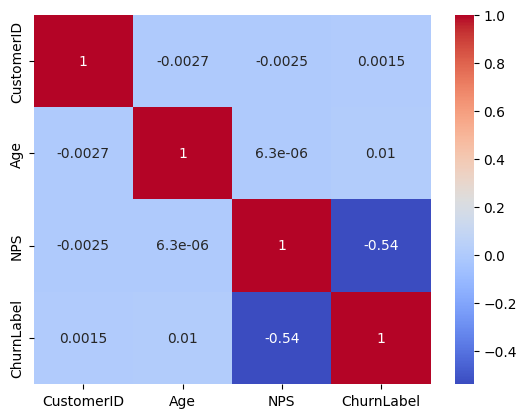

In [111]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation, cbar=True, annot=True, cmap="coolwarm")

In [112]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [113]:
# List of columns containing nested data
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication',
]

# Set width for the formatting of output
w1, w2 = 25, 1000

# Iterate over each column in nested_columns
for col in nested_columns:
    row = [col, df[col][0]]
    print("\n{:<{w1}}{:<{w2}}".format(*row, w1=w1, w2=w2))


PurchaseHistory          [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

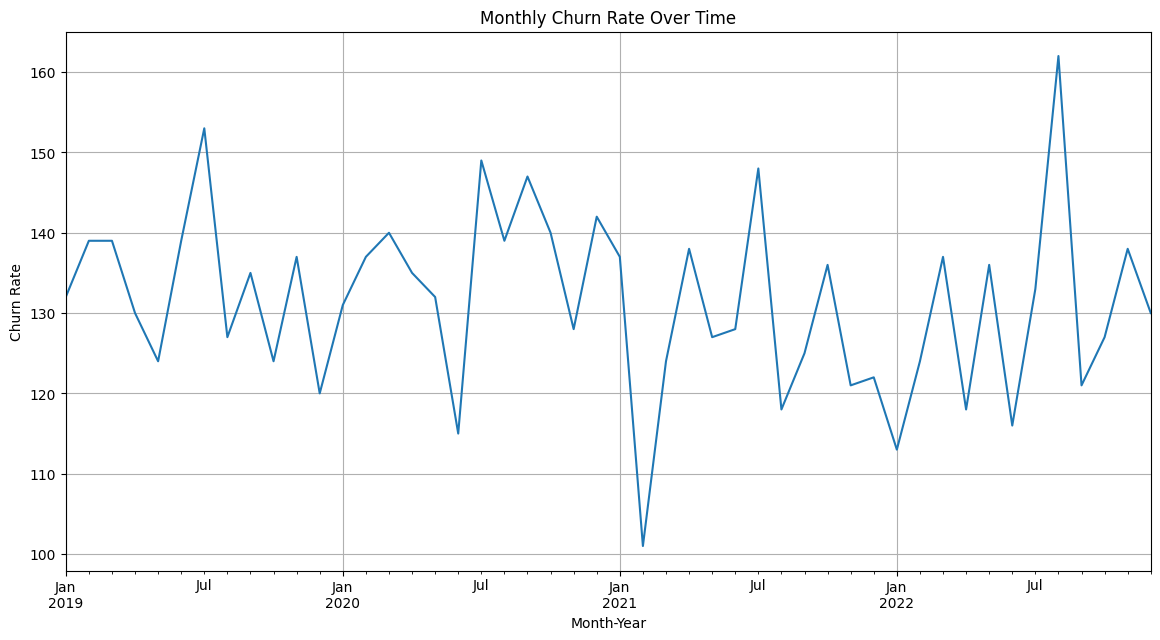

In [114]:
#temporal Analysis

# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Month-Year period
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Calculate monthly churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the churn rate over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title("Monthly Churn Rate Over Time")  # Add a meaningful title
plt.xlabel("Month-Year")  # Add x-axis label
plt.ylabel("Churn Rate")  # Add y-axis label
plt.grid(True)  # Optional: Add grid for better readability
plt.show()


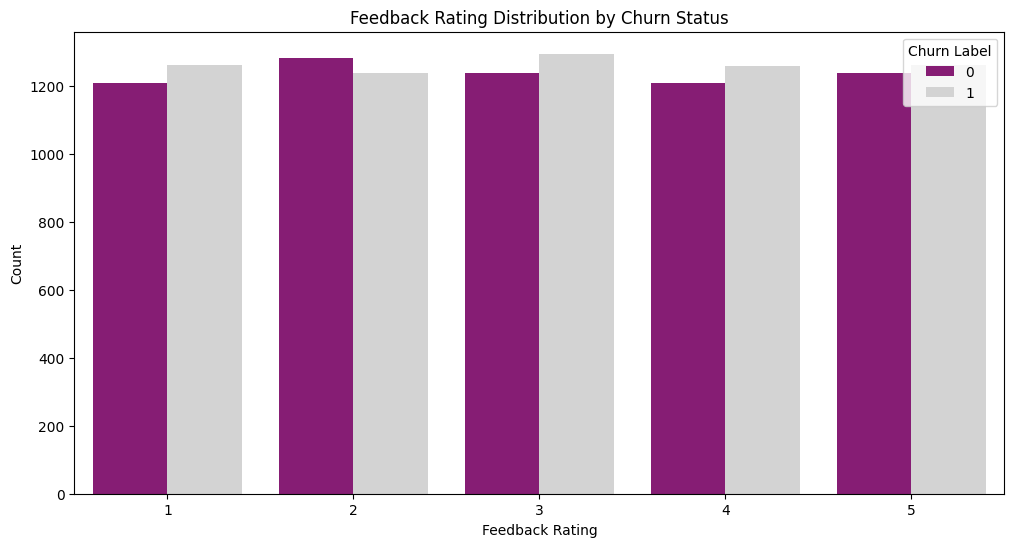

In [115]:
import ast

# Safely extract the 'rating' field from the 'feedbackrating' column
df['feedbackrating'] = df['Feedback'].apply(lambda x: ast.literal_eval(x)['Rating'])

# Define colors
color = ["#980B80", "#D3D3D3", "#808080"]

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='feedbackrating', data=df, hue='ChurnLabel', palette=color)
plt.title("Feedback Rating Distribution by Churn Status")
plt.xlabel("Feedback Rating")
plt.ylabel("Count")
plt.legend(title="Churn Label")
plt.show()


**DATA PROCESSING AND FEATURE ENGINEERING**

In [116]:
from ast import literal_eval

# List of columns containing nested data
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication',
]

# Apply 'literal_eval' to each column in the 'nested_columns' list
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

In [117]:
# Safely extract purchased products, purchase frequency, and value
df['purchasedproducts'] = df['PurchaseHistory'].apply(
    lambda x: '/'.join([i['Product'] for i in x]) if isinstance(x, list) else None
)
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(
    lambda x: sum([i['Frequency'] for i in x]) if isinstance(x, list) else 0
)
df['PurchaseValue'] = df['PurchaseHistory'].apply(
    lambda x: sum([i['Value'] for i in x]) if isinstance(x, list) else 0
)

In [118]:
# Safely extract subscription details
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x.get('Plan') if isinstance(x, dict) else None)
df['SubcriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x.get('Start_date') if isinstance(x, dict) else None)
df['SubcriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x.get('End_Date') if isinstance(x, dict) else None)

# Convert dates and calculate duration
df['SubcriptionStartDate'] = pd.to_datetime(df['SubcriptionStartDate'], errors='coerce')
df['SubcriptionEndDate'] = pd.to_datetime(df['SubcriptionEndDate'], errors='coerce')
df['SubcriptionDuration'] = (df['SubcriptionEndDate'] - df['SubcriptionStartDate']).dt.days


In [119]:
# Safely extract website usage metrics
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x.get('PageViews') if isinstance(x, dict) else 0)
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x.get('Timespent(minutes)') if isinstance(x, dict) else 0)

# Safely extract engagement metrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x.get('Logins') if isinstance(x, dict) else 0)
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x.get('Frequency') if isinstance(x, dict) else 0)

# Safely extract feedback details
df['feedbackrating'] = df['Feedback'].apply(lambda x: x.get('rating') if isinstance(x, dict) else None)
df['feedbackcomment'] = df['Feedback'].apply(lambda x: x.get('comment') if isinstance(x, dict) else None)


In [120]:
# Safely calculate marketing communication metrics
df['marketingcommunicationnoofemails'] = df['MarketingCommunication'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i.get('Email_Clicked', pd.NaT)) - pd.to_datetime(i.get('Email_Opened', pd.NaT))).days
        for i in x if isinstance(i, dict) and i.get('Email_Clicked') and i.get('Email_Opened')
    ]) if isinstance(x, list) else None
)

df['MarketingCommunicationSentOpendiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i.get('Email_Opened', pd.NaT)) - pd.to_datetime(i.get('Email_Sent', pd.NaT))).days
        for i in x if isinstance(i, dict) and i.get('Email_Opened') and i.get('Email_Sent')
    ]) if isinstance(x, list) else None
)

In [121]:
# Ensure WebsiteTimeSpent, feedbackrating, and SubcriptionDuration have no NaN/None values
df['WebsiteTimeSpent'] = df['WebsiteTimeSpent'].fillna(0).astype(int)
df['feedbackrating'] = df['feedbackrating'].fillna(0).astype(int)
df['SubcriptionDuration'] = df['SubcriptionDuration'].fillna(0).astype(int)


In [125]:
# Extract unique service interaction types from the 'ServiceInteractions' column
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_types = []
for i in service_interaction_types:
    unique_service_interaction_types.extend(i)
unique_service_interaction_types = list(set(unique_service_interaction_types))
print('All unique service interaction types: ', unique_service_interaction_types)

All unique service interaction types:  ['Email', 'Chat', 'Call']


In [127]:
# Extract unique payment methods from the 'PaymentHistory' column
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique payment history methods: ', unique_payment_history_methods)

All unique payment history methods:  ['Bank Transfer', 'Credit Card', 'PayPal']


In [128]:
# Extract unique actions from the 'ClickstreamData' column
clickstream_data_actions = df['ClickstreamData'].apply(
    lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique clickstream data actions: ', unique_clickstream_data_actions)

All unique clickstream data actions:  ['Search', 'Click', 'Add to Cart']


In [129]:
# ServiceInteractions
for usit in unique_service_interaction_types:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(
        lambda x: len([i for i in x if i['Type'] == usit])
    )

# PaymentHistory
df['PaymentHistoryNoOfLatePayment'] = df['PaymentHistory'].apply(
    lambda x: sum(i['Late_Payments'] for i in x)
)
df['PaymentHistoryAVGNoOfLatePayment'] = df['PaymentHistory'].apply(
    lambda x: np.mean([i['Late_Payments'] for i in x])
)

# ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(
        lambda x: len([i for i in x if i['Action'] == ucda])  # Fixed "xif" to "x if"
    )



In [130]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'feedbackrating', 'purchasedproducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubcriptionStartDate',
       'SubcriptionEndDate', 'SubcriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'feedbackcomment',
       'marketingcommunicationnoofemails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpendiff', 'ServiceInteractions_Email',
       'ServiceInteractions_Chat', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayment', 'PaymentHistoryAVGNoOfLatePayment',
       'ClickStreamData_Search'

In [131]:
df_  = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'feedbackrating',
    'marketingcommunicationnoofemails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpendiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayment',
    'ClickStreamData_Search',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'SubcriptionDuration'
     ]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpendiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayment,ClickStreamData_Search,ClickStreamData_Click,ClickStreamData_Add to Cart,SubcriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,0,19,...,319.0,818.0,1,1,2,40,12,4,8,0
1,66,Female,6,0,4,2844.35,Pro,100,0,9,...,88.0,110.0,5,10,4,10,7,9,8,0
2,36,Female,3,0,14,1866.52,Essential,1,0,19,...,117.0,333.0,1,1,1,8,7,3,2,0
3,62,Female,1,1,28,1378.64,Smart,25,0,4,...,423.0,159.0,17,18,24,79,16,16,15,0
4,68,Female,3,0,39,2425.05,Basic,77,0,12,...,96.0,193.0,4,5,1,2,4,9,17,0


In [134]:
df_.loc[0]

,0
Age,31
Gender,Male
NPS,3
ChurnLabel,1
PurchaseFrequency,38
PurchaseValue,3994.72
SubscriptionPlan,Express
WebsitePageViews,49
WebsiteTimeSpent,0
EngagementMetricsLogins,19


In [135]:
print('The total length: ',len(df_))

The total length:  12483


In [136]:
df_.nunique()

,0
Age,53
Gender,2
NPS,10
ChurnLabel,2
PurchaseFrequency,78
PurchaseValue,12405
SubscriptionPlan,20
WebsitePageViews,100
WebsiteTimeSpent,1
EngagementMetricsLogins,30


In [137]:
# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()  # Fixed typo in variable name
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency encoding
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()  # Fixed typo in variable name
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode
df_.loc[:, 'Gender'] = df_.loc[:,'Gender'].map(gender_map)  # Simplified without `loc`
df_.loc[:, 'SubscriptionPlan'] =  df_.loc[:,'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:,'EngagementMetricsFrequency'] = df_.loc[:,'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [138]:
df_.loc[0]

,0
Age,31
Gender,0
NPS,3
ChurnLabel,1
PurchaseFrequency,38
PurchaseValue,3994.72
SubscriptionPlan,0
WebsitePageViews,49
WebsiteTimeSpent,0
EngagementMetricsLogins,19


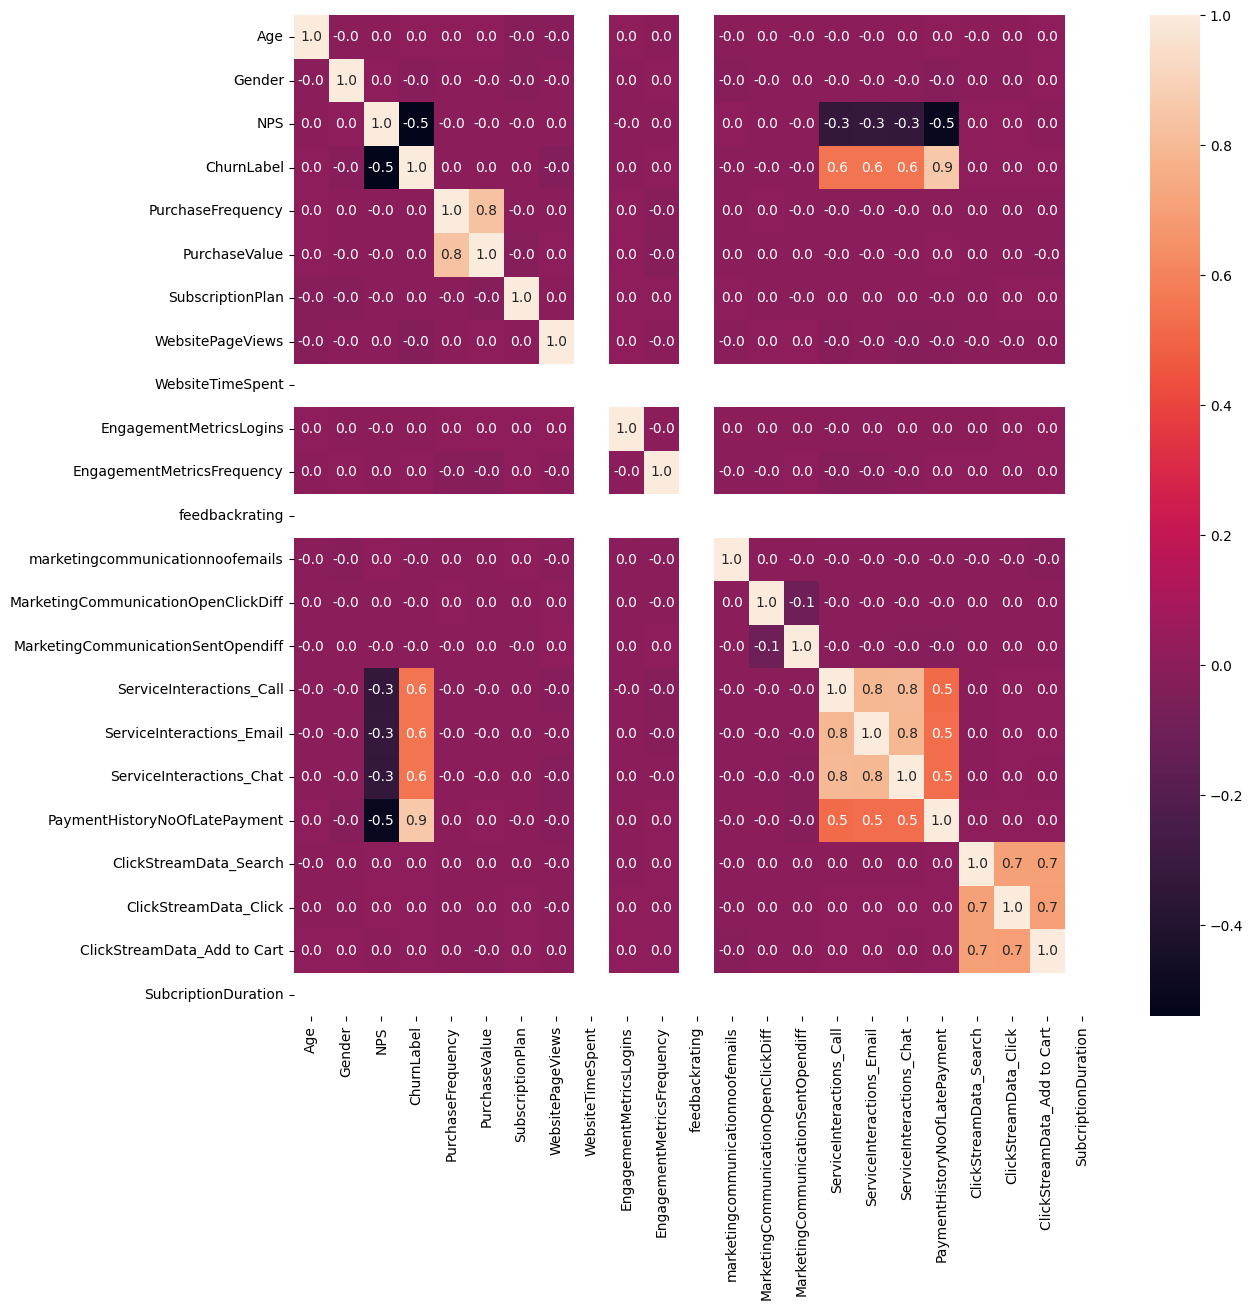

In [139]:
# Compute correlation matrix
df_corr = df_.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(13, 13))  # Fixed typo in parameter name

# Plot the heatmap
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)

# Display the plot
plt.show()


In [140]:
X = df_.drop(columns = ['ChurnLabel'])
y = df_['ChurnLabel']

X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.8,random_state = 42)
X_test,X_val,y_test, y_val = train_test_split(X_other,y_other,test_size= 0.3, random_state = 42)

In [141]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
standard = StandardScaler()

# Apply the scaler
X_train = standard.fit_transform(X_train)  # Corrected method name
X_val = standard.transform(X_val)
X_test = standard.transform(X_test)


In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(X, y, model, subset=''):
    """
    Evaluates a model's performance on a dataset and prints key classification metrics.

    Parameters:
    - X: Feature data (input)
    - y: True target labels
    - model: Trained model to be evaluated
    - subset: Label indicating the dataset being evaluated (e.g., 'Train', 'Validation', 'Test')
    """
    # Generate predictions
    y_pred = model.predict(X)

    # Print evaluation metrics
    print(f'{subset} Accuracy Score: {accuracy_score(y, y_pred):.4f}')
    print(f'{subset} Precision Score: {precision_score(y, y_pred):.4f}')
    print(f'{subset} Recall Score: {recall_score(y, y_pred):.4f}')
    print(f'{subset} F1 Score: {f1_score(y, y_pred):.4f}')


In [143]:
# Instantiate the Logistic Regression model
lr = LogisticRegression()

# Fit the model to the training data (X_train = features, y_train = target variable)
lr.fit(X_train, y_train)

# Evaluate the model on the training set (X_train, y_train)
evaluate(X_train, y_train, lr, 'Train')

# Evaluate the model on the validation set (X_val, y_val)
evaluate(X_val, y_val, lr, 'Validation')


Train Accuracy Score: 0.9686
Train Precision Score: 0.9766
Train Recall Score: 0.9612
Train F1 Score: 0.9688
Validation Accuracy Score: 0.9680
Validation Precision Score: 0.9644
Validation Recall Score: 0.9697
Validation F1 Score: 0.9670


In [144]:
# Instantiate the Decision Tree Classifier with a maximum depth of 5
dt = DecisionTreeClassifier(max_depth=5)

# Fit the Decision Tree model to the training data (X_train = features, y_train = target variable)
dt.fit(X_train, y_train)

# Evaluate the Decision Tree model on the training set (X_train, y_train)
evaluate(X_train, y_train, dt, subset='Train')

# Evaluate the Decision Tree model on the validation set (X_val, y_val)
evaluate(X_val, y_val, dt, subset='Validation')

Train Accuracy Score: 0.9769
Train Precision Score: 0.9775
Train Recall Score: 0.9770
Train F1 Score: 0.9773
Validation Accuracy Score: 0.9680
Validation Precision Score: 0.9644
Validation Recall Score: 0.9697
Validation F1 Score: 0.9670


In [145]:
# Evaluate the Logistic Regression model on the test dataset
evaluate(X_test, y_test, lr, subset='LogisticRegression Test')

# Evaluate the Decision Tree model on the test dataset
evaluate(X_test, y_test, dt, subset='DecisionTreeClassifier Test')


LogisticRegression Test Accuracy Score: 0.9662
LogisticRegression Test Precision Score: 0.9732
LogisticRegression Test Recall Score: 0.9587
LogisticRegression Test F1 Score: 0.9659
DecisionTreeClassifier Test Accuracy Score: 0.9725
DecisionTreeClassifier Test Precision Score: 0.9736
DecisionTreeClassifier Test Recall Score: 0.9713
DecisionTreeClassifier Test F1 Score: 0.9724


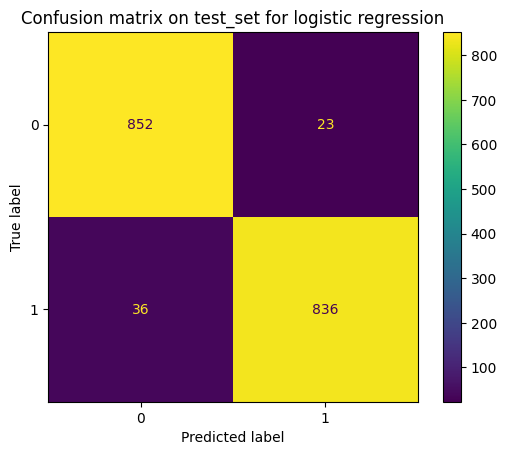

In [146]:
# Predict the labels for the test set using the logistic regression model
lr_pred = lr.predict(X_test)

# Generate the confusion matrix for the logistic regression predictions
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)

# Display the confusion matrix using a heatmap-like visualization
display = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrix)
display.plot()

# Set the title for the plot
plt.title('Confusion matrix on test_set for logistic regression')

# Show the plot
plt.show()


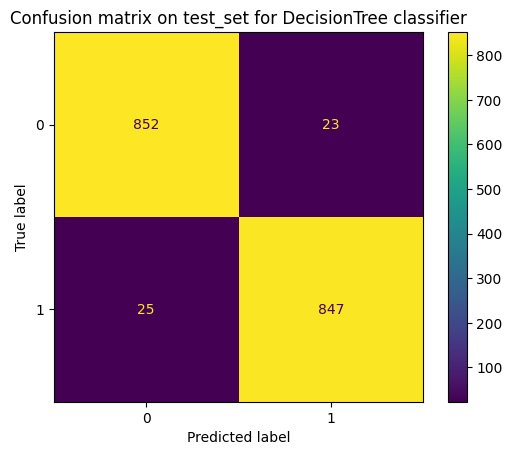

In [147]:
# Predict the labels for the test set using the decision tree classifier model
dt_pred = dt.predict(X_test)

# Generate the confusion matrix for the decision tree predictions
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)

# Display the confusion matrix using a heatmap-like visualization
display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix)
display.plot()

# Set the title for the plot
plt.title('Confusion matrix on test_set for DecisionTree classifier')

# Show the plot
plt.show()

### **Synthesis of Insights and Conclusions on Customer Churn Prediction**

---

#### **Model Performance:**
Both **Logistic Regression** and **Decision Tree** models demonstrate strong performance in predicting customer churn. The **Logistic Regression** model is slightly better at **recall**, which is essential when the priority is to retain customers likely to churn. Conversely, the **Decision Tree** model excels in **precision**, ensuring that fewer resources are wasted on customers who are unlikely to churn. Both models perform well across training, validation, and test sets, confirming their robustness.

#### **Evaluation Metrics for Business Decision-Making:**
- **Precision and Recall** are critical for churn prediction. **Logistic Regression**'s higher recall suggests it’s better at identifying all customers at risk, which is useful when proactive retention is a priority. On the other hand, **Decision Tree**'s higher precision minimizes unnecessary interventions, making it more effective for minimizing false positives.
- **F1 Scores** for both models indicate a good balance between precision and recall, suggesting both models are reliable for churn predictions, allowing businesses to make informed decisions on retention strategies.

#### **Confusion Matrix Analysis:**
Both models effectively differentiate between churn and non-churn customers, with low **False Positives (FP)** and **False Negatives (FN)**. This means resources can be directed efficiently toward customers likely to churn, while avoiding wasteful outreach to non-churning customers.

#### **Identifying Susceptible Customers to Churn:**
Key features such as **demographics, engagement metrics, payment history, and service interactions** are critical in determining churn. Customers with **low engagement**, **shorter tenure**, or **negative service experiences** are more likely to churn. By identifying these factors, businesses can target retention strategies more effectively.

#### **Feature Importance (Decision Tree):**
The **Decision Tree** model provides valuable insights into the most influential features driving churn, including:
- **Tenure**: Customers with shorter tenures are more prone to churn, suggesting a need for early-stage retention strategies.
- **Engagement Metrics**: Low engagement is a strong indicator of churn, emphasizing the need for proactive efforts to keep customers engaged.
- **Payment Behavior**: Inconsistent payment methods can signal churn risk, allowing businesses to address financial concerns early on.
- **Service Interactions**: Negative interactions can correlate strongly with churn, underscoring the importance of customer support.

#### **Business Strategy and Retention Actions:**
- **Customer Segmentation**: The models enable effective segmentation, allowing businesses to create tailored strategies for **high-risk** and **low-risk** customers. High-risk customers may benefit from personalized offers, loyalty programs, or enhanced customer service.
- **Proactive Interventions**: Targeting high-risk customers with timely interventions like special offers or customer support outreach can reduce churn.
- **Customer Feedback**: Collecting feedback through surveys or NPS can help understand the reasons behind churn, further refining retention efforts.
- **Retention Metrics**: Ongoing monitoring and adjustment of churn models are essential for adapting to evolving customer behaviors and improving retention strategies.

#### **Further Enhancements:**
- **Advanced Techniques**: Integrating advanced models like **Gradient Boosting** or **Random Forest** can improve performance, particularly with imbalanced datasets.
- **Model Tuning**: Hyperparameter tuning through grid search or random search can enhance model accuracy.
- **Data Enrichment**: Gathering additional customer interaction data can lead to more robust models and improve churn prediction accuracy.

---

### **Conclusion:**
Both **Logistic Regression** and **Decision Tree** models provide valuable tools for predicting customer churn, with the **Decision Tree** offering better precision and **Logistic Regression** excelling in recall. Businesses can use these insights to prioritize retention efforts, focusing on high-risk customers based on key features such as **tenure**, **engagement**, and **service interactions**. Implementing targeted interventions, continuous model evaluation, and gathering more detailed customer data can further refine churn prediction models, ultimately reducing churn rates, improving retention, and increasing overall customer satisfaction and business profitability.